# **Machine Learning Application: Genetic hallmarks of recurrent/metastatic adenoid cystic carcinoma**

**PMID:** 31483290

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 10)

## Import Data

### Clinical Patient Data

In [3]:
df_clinical_patients = pd.read_csv("data/acc_2019_data_clinical_patient.txt", skiprows=4, sep='\t')
df_clinical_patients

,PATIENT_ID,DATA_SOURCE,STUDY,AGE,SEX,OS_MONTHS,OS_STATUS
0,PD7296a,Sanger/MDACC,ACyC (Sanger unpubl.),50.0,Male,NaN,NaN
1,PD7284a,Sanger/MDACC,ACyC (Sanger unpubl.),49.0,Male,NaN,NaN
2,PD7286a,Sanger/MDACC,ACyC (Sanger unpubl.),61.0,Female,NaN,NaN
3,PD7143a,Sanger/MDACC,ACyC (Sanger unpubl.),43.0,Female,NaN,NaN
4,PD7141a,Sanger/MDACC,ACyC (Sanger unpubl.),44.0,Female,NaN,NaN
...,...,...,...,...,...,...,...
1040,P-0017600,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Female,65.194,0:LIVING
1041,P-0017620,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Male,78.838,0:LIVING
1042,P-0017745,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Female,11.836,0:LIVING
1043,P-0018440,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Male,276.854,1:DECEASED


In [4]:
df_clinical_patients.to_csv("acc_2019_clinical_patients_cleaned", sep='\t')

### Gene Mutations Data

In [5]:
df_gene_mutations = pd.read_csv("data/acc_2019_data_mutations.txt", sep='\t', dtype='unicode')
df_gene_mutations

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,VARIANT_CLASS,all_effects,amino_acid_change,cDNA_Change,cDNA_position,cdna_change,comments,n_depth,t_depth,transcript
0,PTEN,5728,Sanger,GRCh37,10,89720720,89720721,+,frameshift_variant,Frame_Shift_Ins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PTEN,5728,Sanger,GRCh37,10,89717696,89717696,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRANK1,9881,Sanger,GRCh37,3,36899333,36899333,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPATA5L1,79029,Sanger,GRCh37,15,45710848,45710849,+,frameshift_variant,Frame_Shift_Ins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EIF2AK3,9451,Sanger,GRCh37,2,88926730,88926732,+,inframe_deletion,In_Frame_Del,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10862,TERT,7015,MSKCC,GRCh37,5,1295228,1295228,+,upstream_gene_variant,5'Flank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10863,TERT,7015,MSKCC,GRCh37,5,1295228,1295228,+,upstream_gene_variant,5'Flank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10864,TERT,7015,MSKCC,GRCh37,5,1295228,1295228,+,upstream_gene_variant,5'Flank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10865,TERT,7015,MSKCC,GRCh37,5,1295250,1295250,+,upstream_gene_variant,5'Flank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The most commonly mutated gene is Notch1. Mutations in chromatin remodeling genes like KDM6A, KMT2D, and KMT2C are also prevalent.

In [6]:
df_gene_mutations["Hugo_Symbol"].mode()

0    NOTCH1
dtype: object

In [7]:
print(df_gene_mutations["Hugo_Symbol"].value_counts())

NOTCH1    348
KDM6A     151
ARID1A    139
KMT2D     135
KMT2C     129
         ... 
LIX1        1
PHKG1       1
OVOL1       1
PTPDC1      1
PLCH2       1
Name: Hugo_Symbol, Length: 3729, dtype: int64


### Gene Panel Data

In [8]:
df_gene_matrix = pd.read_csv("data/acc_2019_data_gene_panel_matrix.txt", sep='\t')
df_gene_matrix

,SAMPLE_ID,mutations
0,ACYC-FMI-01,ACYC_FMI_27
1,ACYC-FMI-02,ACYC_FMI_27
2,ACYC-FMI-03,ACYC_FMI_27
3,ACYC-FMI-04,ACYC_FMI_27
4,ACYC-FMI-05,ACYC_FMI_27
...,...,...
851,P-0014382-T01-IM6,MYB-IMPACT468
852,P-0014405-T01-IM6,MYB-IMPACT468
853,P-0014472-T01-IM6,MYB-IMPACT468
854,P-0014709-T01-IM6,MYB-IMPACT468


Most common mutations from gene panel

In [9]:
table_gene_matrix = df_gene_matrix.groupby(['mutations']).count()
table_gene_matrix

,SAMPLE_ID
mutations,
ACYC_FMI_27,28
FMI-D2,2
FMI-R2,1
FMI-T4b,23
FMI-T5a,174
FMI-T7,530
MYB-IMPACT341,28
MYB-IMPACT410,54
MYB-IMPACT468,16


PDGFRA (platelet-derived growth factor receptor A) is a receptor located on the surface of a wide range of cell types.

In [10]:
df_acyc_fmi_27 = pd.read_csv("data/data_gene_panel_acyc_fmi_27.txt", skiprows=2, sep='\t')
genes = list(df_acyc_fmi_27)
genes[0] = genes[0].split()[-1]
genes[0]

'PDGFRA'

VHL (von Hippel-Lindau tumor suppressor) encodes a component of a ubiquitination complex involved in the ubiquitination and degradation of hypoxia-inducible-factor (HIF), which is a transcription factor that plays a central role in the regulation of gene expression by oxygen. 

In [11]:
df_fmi_t7 = pd.read_csv("data/data_gene_panel_fmi_t7.txt", skiprows=2, sep='\t')
genes = list(df_fmi_t7)
genes[0] = genes[0].split()[-1]
genes[0]

'VHL'

4. Clinical sample data

In [12]:
df_clinical_sample = pd.read_csv("data/acc_2019_data_clinical_sample.txt", skiprows=4, sep='\t')
df_clinical_sample

,PATIENT_ID,SAMPLE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE,ONCOTREE_CODE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,PD7296a,PD7296a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
1,PD7284a,PD7284a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.100000
2,PD7286a,PD7286a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.266667
3,PD7143a,PD7143a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,2.033333
4,PD7141a,PD7141a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
...,...,...,...,...,...,...,...,...
1044,P-0017600,P-0017600-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,1.951366
1045,P-0017620,P-0017620-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.975683
1046,P-0017745,P-0017745-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.000000
1047,P-0018440,P-0018440-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,0.000000


5. Fusions

In [13]:
df_fusions_raw = pd.read_csv("data/acc_2019_data_fusions.txt", sep='\t')
df_fusions = df_fusions_raw.sort_values(by="Tumor_Sample_Barcode")
df_fusions

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation
147,NFIB,4781,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
129,MYB,4602,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
244,GLDN,342035,JHU,ACYC-JHU_PGDX1762T,MYO5A-GLDN fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
239,PEAK1,79834,JHU,ACYC-JHU_PGDX1762T,PEAK1-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
240,ARID1A,8289,JHU,ACYC-JHU_PGDX1762T,ARID1A-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
356,ATRX,0,Foundation,XRN-Y1A6R5,ATRX-intergenic,yes,unknown,NaN,unknown,NaN,NaN
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN
503,POP1,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN
502,MYB,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN


In [14]:
gene_symbols = df_fusions["Hugo_Symbol"]

### Clinical Sample Data

In [15]:
df_clinical_sample = pd.read_csv("data/acc_2019_data_clinical_sample.txt", skiprows=4, sep='\t')
df_clinical_sample

,PATIENT_ID,SAMPLE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE,ONCOTREE_CODE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,PD7296a,PD7296a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
1,PD7284a,PD7284a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.100000
2,PD7286a,PD7286a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.266667
3,PD7143a,PD7143a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,2.033333
4,PD7141a,PD7141a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
...,...,...,...,...,...,...,...,...
1044,P-0017600,P-0017600-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,1.951366
1045,P-0017620,P-0017620-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.975683
1046,P-0017745,P-0017745-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.000000
1047,P-0018440,P-0018440-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,0.000000


Primary Samples

In [16]:
df_clinical_sample_primary = df_clinical_sample[df_clinical_sample['SAMPLE_TYPE'] == "Primary"]
df_clinical_sample_primary

,PATIENT_ID,SAMPLE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE,ONCOTREE_CODE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,PD7296a,PD7296a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
1,PD7284a,PD7284a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.100000
2,PD7286a,PD7286a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.266667
3,PD7143a,PD7143a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,2.033333
4,PD7141a,PD7141a,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.933333
...,...,...,...,...,...,...,...,...
1037,P-0015101,P-0015101-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,1.741867
1039,P-0015992,P-0015992-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.000000
1042,P-0016421,P-0016421-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.870934
1045,P-0017620,P-0017620-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Primary,ACYC,Matched,0.975683


Recurrant and/or Metastatic (R/M) Samples

In [17]:
df_clinical_sample_temp = df_clinical_sample[df_clinical_sample['SAMPLE_TYPE'] != "Primary"]
df_clinical_sample_rm = df_clinical_sample_temp.dropna()
df_clinical_sample_rm

,PATIENT_ID,SAMPLE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE,ONCOTREE_CODE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
951,P-0000202,P-0000202-T01-IM3,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,2.210514
953,P-0000374,P-0000374-T01-IM3,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,2.210514
955,P-0000507,P-0000507-T01-IM3,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,6.631542
956,P-0000524,P-0000524-T01-IM3,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,3.315771
959,P-0000623,P-0000623-T02-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,0.975683
...,...,...,...,...,...,...,...,...
1041,P-0016400,P-0016400-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,2.612801
1043,P-0017244,P-0017244-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,6.967470
1044,P-0017600,P-0017600-T01-IM5,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,1.951366
1047,P-0018440,P-0018440-T01-IM6,Salivary Cancer,Adenoid Cystic Carcinoma,Metastasis,ACYC,Matched,0.000000


### Fusions Data

In [18]:
df_fusions = pd.read_csv('data/acc_2019_data_fusions.txt', sep='\t')
sorted_df_fusions = df_fusions = df_fusions.sort_values(by='Tumor_Sample_Barcode')
sorted_df_fusions

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation
147,NFIB,4781,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
129,MYB,4602,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
244,GLDN,342035,JHU,ACYC-JHU_PGDX1762T,MYO5A-GLDN fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
239,PEAK1,79834,JHU,ACYC-JHU_PGDX1762T,PEAK1-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
240,ARID1A,8289,JHU,ACYC-JHU_PGDX1762T,ARID1A-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
356,ATRX,0,Foundation,XRN-Y1A6R5,ATRX-intergenic,yes,unknown,NaN,unknown,NaN,NaN
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN
503,POP1,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN
502,MYB,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN


## Clinical Data Filter

In [19]:
df_cases = pd.read_csv("data/acc_2019_cases_sequenced.txt", skiprows=5, sep='\t')
df_cases_sequences = list(df_cases)
df_cases_sequences[0] = df_cases_sequences[0].split()[-1]

sampled_sequences = df_cases_sequences
patients_sequenced = ["-".join(item.split("-")[:2]) for item in df_cases_sequences]

In [20]:
clinical_data = df_clinical_patients[df_clinical_patients['PATIENT_ID'].isin(patients_sequenced)]
clinical_data

,PATIENT_ID,DATA_SOURCE,STUDY,AGE,SEX,OS_MONTHS,OS_STATUS
0,PD7296a,Sanger/MDACC,ACyC (Sanger unpubl.),50.0,Male,NaN,NaN
1,PD7284a,Sanger/MDACC,ACyC (Sanger unpubl.),49.0,Male,NaN,NaN
2,PD7286a,Sanger/MDACC,ACyC (Sanger unpubl.),61.0,Female,NaN,NaN
3,PD7143a,Sanger/MDACC,ACyC (Sanger unpubl.),43.0,Female,NaN,NaN
4,PD7141a,Sanger/MDACC,ACyC (Sanger unpubl.),44.0,Female,NaN,NaN
...,...,...,...,...,...,...,...
1040,P-0017600,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Female,65.194,0:LIVING
1041,P-0017620,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Male,78.838,0:LIVING
1042,P-0017745,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Female,11.836,0:LIVING
1043,P-0018440,MSK-IMPACT,"ACyC, ACbC, LUACC Cohort (MSK-IMPACT, 2016)",NaN,Male,276.854,1:DECEASED


### Filter by Outcome

Filter the clinical data by outcome (living/deceased). Only those patients who have died of their disease are included in the deceased patients list.

In [21]:
alive = df_clinical_patients[df_clinical_patients['OS_STATUS']=="0:LIVING"]
deceased = df_clinical_patients[df_clinical_patients['OS_STATUS']=="1:DECEASED"]

alive_patients = list(alive["PATIENT_ID"])
deceased_patients = list(deceased["PATIENT_ID"])

print("Number of living patients: " + str(len(alive_patients)))
print("Number of deceased patients: " + str(len(deceased_patients)))

Number of living patients: 93
Number of deceased patients: 52


In [22]:
clinical_data_gene_sequences = df_fusions[df_fusions['Tumor_Sample_Barcode'].isin(sampled_sequences)]
clinical_data_gene_sequences

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation
147,NFIB,4781,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
129,MYB,4602,JHU,ACYC-JHU_PGDX1762T,MYB-NFIB fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
244,GLDN,342035,JHU,ACYC-JHU_PGDX1762T,MYO5A-GLDN fusion,Unknown,Unknown,Unknown,Unknown,NaN,NaN
239,PEAK1,79834,JHU,ACYC-JHU_PGDX1762T,PEAK1-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
240,ARID1A,8289,JHU,ACYC-JHU_PGDX1762T,ARID1A-truncation,Unknown,Unknown,Unknown,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
356,ATRX,0,Foundation,XRN-Y1A6R5,ATRX-intergenic,yes,unknown,NaN,unknown,NaN,NaN
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN
503,POP1,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN
502,MYB,0,Foundation,XRN-YUGE2P,MYB-POP1 rearrangement,yes,unknown,NaN,unknown,NaN,NaN


## Gene Query Finder

### Query by Gene

In [23]:
def query_by_gene(dataframe_genes, hugo_symbol):
    return dataframe_genes[dataframe_genes['Hugo_Symbol']==hugo_symbol]

In [24]:
def add_patients(dataframe):
    temp_dataframe = dataframe.copy()
    label = lambda row:  "-".join(row["Tumor_Sample_Barcode"].split("-")[:2])
    temp_dataframe['PATIENT_ID'] = dataframe.apply(label, axis="columns")
    return temp_dataframe

### Example Query (Notch1)

Query by Notch1, the most commonly mutated gene observed in this study.

In [25]:
clinical_data_with_patients = add_patients(clinical_data_gene_sequences)
query_by_gene(clinical_data_with_patients,"NOTCH1")

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation,PATIENT_ID
571,NOTCH1,0,Foundation,XRN-43GL6X,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-43GL6X
513,NOTCH1,0,Foundation,XRN-73FKDG,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-73FKDG
446,NOTCH1,0,Foundation,XRN-HWUT0C,NOTCH1-SEC16A fusion,yes,unknown,NaN,unknown,NaN,NaN,XRN-HWUT0C
484,NOTCH1,0,Foundation,XRN-JSYYMP,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-JSYYMP
370,NOTCH1,0,Foundation,XRN-PRA7TP,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-PRA7TP
616,NOTCH1,0,Foundation,XRN-WHKNQC,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-WHKNQC
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-YNQTF4


## Investigate At-Risk Genes

In [26]:
alive_patients_genes = clinical_data_with_patients[clinical_data_with_patients['PATIENT_ID'].isin(alive_patients)]
deceased_patients_genes = clinical_data_with_patients[clinical_data_with_patients['PATIENT_ID'].isin(deceased_patients)]

### Alive Patients Genes

In [27]:
alive_patients_genes

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation,PATIENT_ID
38,NFIB,4781,MSKCC,ACYC-MSKCC_000236,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000236
39,MYB,4602,MSKCC,ACYC-MSKCC_000236,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000236
18,NFIB,4781,MSKCC,ACYC-MSKCC_000410,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000410
19,MYB,4602,MSKCC,ACYC-MSKCC_000410,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000410
16,NFIB,4781,MSKCC,ACYC-MSKCC_000479,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000479
...,...,...,...,...,...,...,...,...,...,...,...,...
673,NFIB,0,MSKCC-DMP,P-0010663-T01-IM5,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0010663
624,SECISBP2L,0,MSKCC-DMP,P-0012051-T01-IM5,SECISBP2L-GREM1 fusion,yes,unknown,NaN,unknown,GREM1 (NM_013372) rearrangement : c.*3295_chr1...,NaN,P-0012051
623,GREM1,0,MSKCC-DMP,P-0012051-T01-IM5,SECISBP2L-GREM1 fusion,yes,unknown,NaN,unknown,GREM1 (NM_013372) rearrangement : c.*3295_chr1...,NaN,P-0012051
650,MYB,0,MSKCC-DMP,P-0014472-T01-IM6,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0014472


### Deceased Patients Genes

In [28]:
deceased_patients_genes

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation,PATIENT_ID
30,NFIB,4781,MSKCC,ACYC-MSKCC_000705,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000705
31,MYB,4602,MSKCC,ACYC-MSKCC_000705,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_000705
51,MYB,4602,MSKCC,ACYC-MSKCC_05_6986,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_05_6986
50,NFIB,4781,MSKCC,ACYC-MSKCC_05_6986,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_05_6986
29,MYB,4602,MSKCC,ACYC-MSKCC_06_2532,MYB-NFIB Fusion,Yes,Yes,"WGS, FISH, RT-PCR",NaN,NaN,NaN,ACYC-MSKCC_06_2532
...,...,...,...,...,...,...,...,...,...,...,...,...
671,NFIB,0,MSKCC-DMP,P-0007849-T02-IM5,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0007849
648,MYB,0,MSKCC-DMP,P-0012652-T01-IM5,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0012652
674,NFIB,0,MSKCC-DMP,P-0012652-T01-IM5,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0012652
649,MYB,0,MSKCC-DMP,P-0013838-T01-IM5,MYB-NFIB fusion,yes,unknown,NaN,unknown,NaN,NaN,P-0013838


### At-Risk Genes

Uncover genes present in deceased patients that are not present in patients who survived their cancer using Set Theory.

In [29]:
all_genes = list(set(clinical_data_with_patients["Hugo_Symbol"]))
len(all_genes)
alive_genes = list(set(alive_patients_genes["Hugo_Symbol"]))
deceased_genes = list(set(deceased_patients_genes["Hugo_Symbol"]))
at_risk_genes = list(set(all_genes) - set(alive_genes))
at_risk_genes

['UNC79',
 'RASGRP1',
 'FGFR3',
 'CMYA5',
 'RAF1',
 'GLI1',
 'STX11',
 'C9orf24',
 'RGS3',
 'EGFR',
 'RPS6KA2',
 'SORCS2',
 'DNAI1',
 'RAB19',
 'POLR2A',
 'RAB39A',
 'XRCC4',
 'TAF1',
 'ARID4A',
 'DNAH2',
 'KANK1',
 'LGR6',
 'NEGR1',
 'DMD',
 'PTPRB',
 'PHF14',
 'CTTNBP2',
 'KDM6A',
 'MAP3K5',
 'AHI1-DT',
 'GLDN',
 'ARID1A',
 'UBAP1',
 'MYLK',
 'FAT1',
 'TSHR',
 'PDGFRA',
 'SOX10',
 'KIAA1211',
 'LURAP1L',
 'SMAD4',
 'UST',
 'IGF1R',
 'PTPN11',
 'TACC3',
 'PTPRD',
 'L3HYPDH',
 'EPHA3',
 'FANCI',
 'PTCH1',
 'RAD51B',
 'C1orf49',
 'TJP2',
 'EP300',
 'RAD54L',
 'CCDC171',
 'LRP6',
 'JAK1',
 'MED23',
 'ATRX',
 'MDM2',
 'C16orf70',
 'TCRA',
 'NKAIN2',
 'C11orf53',
 'LAMA2',
 'SAP130',
 'HDAC4',
 'BCL2',
 'MDN1',
 'BNC2',
 'KCNH8',
 'PDCD1LG2',
 'SEC16A',
 'MYO5A',
 'HLA',
 'HLA-H',
 'FAM118B',
 'PPP1R3A',
 'BOC',
 'HBS1L',
 'C16orf52',
 'HIPK3',
 'PPP2R1A',
 'GSK3B',
 'SMARCA4',
 'POLH',
 'WAC',
 'KIAA0247',
 'LDLRAD3',
 'ASXL1',
 'ERC1',
 'PTPRM',
 'DICER1',
 'IKBKAP',
 'YTHDF3',
 'UTRN',


## Analysis

Count the at risk genes to determine which is most prevalent. Notch1 is one of the most prevalent at risk genes, and was also the most frequently mutated gene observed in this study.

In [30]:
gene_count = []
template_dict = {"Hugo_Symbol":"","Count":""}
for gene in at_risk_genes:
    temp_dict = template_dict.copy()
    sample = query_by_gene(clinical_data_with_patients,gene)
    temp_dict["Hugo_Symbol"] = gene
    temp_dict["Count"] = len(set(sample["PATIENT_ID"]))
    gene_count.append(temp_dict)
    
count_frame = pd.DataFrame(data = gene_count)
count_frame.sort_values(by='Count', ascending=False)[:3]

,Hugo_Symbol,Count
168,MYBL1,7
175,NOTCH1,7
133,NOTCH2,5


### Ignoring Different Fusions

In [31]:
gene_count = []
for gene in at_risk_genes:
    temp_dict = template_dict.copy()
    sample = query_by_gene(clinical_data_with_patients,gene)
    temp_dict["Hugo_Symbol"] = gene
    temp_dict["Count"] = len(set(sample["PATIENT_ID"]))
    gene_count.append(temp_dict)
    
count_frame = pd.DataFrame(data = gene_count)
count_frame.sort_values(by='Count', ascending=False)[:3]

,Hugo_Symbol,Count
168,MYBL1,7
175,NOTCH1,7
133,NOTCH2,5


### NOTCH1

In [32]:
patient_query = query_by_gene(clinical_data_with_patients,"NOTCH1")
patients_stk11 = list(patient_query["PATIENT_ID"])
patient_query

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation,PATIENT_ID
571,NOTCH1,0,Foundation,XRN-43GL6X,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-43GL6X
513,NOTCH1,0,Foundation,XRN-73FKDG,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-73FKDG
446,NOTCH1,0,Foundation,XRN-HWUT0C,NOTCH1-SEC16A fusion,yes,unknown,NaN,unknown,NaN,NaN,XRN-HWUT0C
484,NOTCH1,0,Foundation,XRN-JSYYMP,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-JSYYMP
370,NOTCH1,0,Foundation,XRN-PRA7TP,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-PRA7TP
616,NOTCH1,0,Foundation,XRN-WHKNQC,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-WHKNQC
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-YNQTF4


In [33]:
clinical_data_with_patients[clinical_data_with_patients['PATIENT_ID'].isin(patients_stk11)]

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame,Comments,Annotation,PATIENT_ID
571,NOTCH1,0,Foundation,XRN-43GL6X,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-43GL6X
512,MTOR,0,Foundation,XRN-73FKDG,MTOR-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-73FKDG
513,NOTCH1,0,Foundation,XRN-73FKDG,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-73FKDG
447,SEC16A,0,Foundation,XRN-HWUT0C,NOTCH1-SEC16A fusion,yes,unknown,NaN,unknown,NaN,NaN,XRN-HWUT0C
446,NOTCH1,0,Foundation,XRN-HWUT0C,NOTCH1-SEC16A fusion,yes,unknown,NaN,unknown,NaN,NaN,XRN-HWUT0C
484,NOTCH1,0,Foundation,XRN-JSYYMP,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-JSYYMP
370,NOTCH1,0,Foundation,XRN-PRA7TP,NOTCH1-intragenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-PRA7TP
616,NOTCH1,0,Foundation,XRN-WHKNQC,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-WHKNQC
619,NOTCH1,0,Foundation,XRN-YNQTF4,NOTCH1-intergenic,yes,unknown,NaN,unknown,NaN,NaN,XRN-YNQTF4


In [34]:
df_clinical_patients[df_clinical_patients['PATIENT_ID'].isin(patients_stk11)]

,PATIENT_ID,DATA_SOURCE,STUDY,AGE,SEX,OS_MONTHS,OS_STATUS
357,XRN-PRA7TP,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Female,NaN,NaN
561,XRN-HWUT0C,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Male,NaN,NaN
639,XRN-JSYYMP,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Male,NaN,NaN
696,XRN-73FKDG,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Male,NaN,NaN
846,XRN-43GL6X,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Male,NaN,NaN
932,XRN-WHKNQC,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Female,NaN,NaN
945,XRN-YNQTF4,Foundation Medicine,"ACyC, ACbC, LUACC Subtypes (MSK/FMI 2017)",NaN,Male,NaN,NaN


### Genes Found in Surviving Patients

These gene variants were found only in surviving patients.

In [35]:
positive_genes = list(set(all_genes) - set(deceased_genes))

positive_gene_count = []
for gene in positive_genes:
    temp_dict = template_dict.copy()
    sample = query_by_gene(clinical_data_with_patients,gene)
    temp_dict["Hugo_Symbol"] = gene
    temp_dict["Count"] = len(set(sample["PATIENT_ID"]))
    positive_gene_count.append(temp_dict)
    
count_frame_positive = pd.DataFrame(data = positive_gene_count)
count_frame_positive.sort_values(by='Count', ascending=False)[:3]
count_frame_positive

,Hugo_Symbol,Count
0,UNC79,1
1,RASGRP1,1
2,FGFR3,1
3,CMYA5,1
4,RAF1,1
...,...,...
204,FUT9,1
205,PRKDC,1
206,SPEN,1
207,ZCCHC11,1


## Machine Learning

Implementing machine learning to try to find gene interaction networks that can predict cancer outcomes. Must aggregate based on genes.

**Random Tree Ensemble**

A **Random Tree Ensemble** is a collection of Decision trees with non-deterministic properties designed to prevent over-fitting through random selection of sample training data and feature sets (columns – in our case gene mutations). They construct a decision tree through usuage of information entropy to enhance the gain of information across a decision node. These trees then form a collection of decision makers that vote on a classification together.

### Aggregate Based on Genes

In [36]:
def mutation_present(dataframe_genes, patient_id, gene):
    query_result = query_by_gene(dataframe_genes, gene)
    result = len(query_result[query_result['PATIENT_ID']== patient_id]) > 0
    return 0 if result == 0 else 1

In [37]:
patients_gene_network = pd.DataFrame()
patients_gene_network["PATIENT_ID"] = df_clinical_patients["PATIENT_ID"]

In [38]:
clinical_data_with_patients["Hugo_Symbol"]

147      NFIB
129       MYB
244      GLDN
239     PEAK1
240    ARID1A
        ...  
356      ATRX
619    NOTCH1
503      POP1
502       MYB
392      MDM2
Name: Hugo_Symbol, Length: 677, dtype: object

In [39]:
all_genes_mapped = list(set(clinical_data_with_patients["Hugo_Symbol"]))

### Gene Map

Create a gene map (dictionary) that maps each gene to patients with mutations in that gene.

In [40]:
def create_gene_map(dataframe_genes, all_genes):
    gene_map = {}
    for gene in all_genes:
        patient_list = list(dataframe_genes[dataframe_genes['Hugo_Symbol']==gene]["PATIENT_ID"])
        gene_map[gene] = patient_list
    return gene_map

In [41]:
gene_map = create_gene_map(clinical_data_with_patients, all_genes_mapped)

### Function to Add a New Patient to the Gene Map

In [42]:
def add_patient_gene_network(dataframe, mapped_genes, gene):
    temp_dataframe = dataframe.copy()
    patients = mapped_genes[gene]
    truth_value = lambda row: row["PATIENT_ID"] in patients
    label = lambda row:  True if truth_value(row) else False
    temp_dataframe[gene] = temp_dataframe.apply(label, axis="columns") #Apply Label
    return temp_dataframe

### Patient Gene Network

The patient gene network is a matrix that represents what genes are mutated in each patient

In [43]:
for gene in all_genes_mapped:
    patients_gene_network = add_patient_gene_network(patients_gene_network, gene_map, gene)
patients_gene_network

,PATIENT_ID,UNC79,RASGRP1,FGFR3,CMYA5,RAF1,GLI1,STX11,C9orf24,RGS3,...,ZBTB20,ZSWIM6,FUT9,SLC16A2,ROS1,FAM210A,PRKDC,SPEN,ZCCHC11,GPR56
0,PD7296a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,PD7284a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,PD7286a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,PD7143a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,PD7141a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,P-0017600,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1041,P-0017620,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1042,P-0017745,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1043,P-0018440,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Confirming Gene Network

Test the gene network with example patient (ID: ACYC-MSKCC_000705) and gene NFIB (should return True)

In [44]:
patients_gene_network[patients_gene_network['PATIENT_ID']=="ACYC-MSKCC_000705"]["NFIB"]

52    True
Name: NFIB, dtype: bool

### Add the Living Patients Data to the Gene Network

In [45]:
def add_class(dataframe, alive_patients_list):
    temp_dataframe = dataframe.copy()
    truth_value = lambda row: row["PATIENT_ID"] in alive_patients_list
    label = lambda row:  1 if truth_value(row) else 0
    temp_dataframe["Survived"] = temp_dataframe.apply(label, axis="columns") #Apply Label
    return temp_dataframe

In [46]:
patients_gene_network = add_class(patients_gene_network, alive_patients)
patients_gene_network

,PATIENT_ID,UNC79,RASGRP1,FGFR3,CMYA5,RAF1,GLI1,STX11,C9orf24,RGS3,...,ZSWIM6,FUT9,SLC16A2,ROS1,FAM210A,PRKDC,SPEN,ZCCHC11,GPR56,Survived
0,PD7296a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,PD7284a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,PD7286a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,PD7143a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,PD7141a,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,P-0017600,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1041,P-0017620,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1042,P-0017745,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1043,P-0018440,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


## Building the Model

### Imports

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Result Table of Analysis

In [58]:
def create_table_of_analysis(dataframe, real_label_column_name, test_label_column_name, positive_result, negative_result):
    row_count = dataframe.shape[0]
    true_positive = dataframe.query('`{0}` == `{1}` and `{1}` == "{2}"'.format(real_label_column_name, test_label_column_name, positive_result))
    false_positive = dataframe.query('`{0}` == "{3}" and `{1}` == "{2}"'.format(real_label_column_name, test_label_column_name, positive_result, negative_result))
    true_negative = dataframe.query('`{0}` == `{1}` and `{0}` == "{2}"'.format(real_label_column_name, test_label_column_name, negative_result))
    false_negative = dataframe.query('`{0}` == "{2}" and `{1}` == "{3}"'.format(real_label_column_name, test_label_column_name, positive_result, negative_result))

    true_positive_r = true_positive.shape[0]
    false_positive_r = false_positive.shape[0]
    true_negative_r = true_negative.shape[0] 
    false_negative_r = false_negative.shape[0]
    accuracy = float((true_positive_r + true_negative_r)) / float(row_count)

    try:
        tpr = float(true_positive_r)/float((true_positive_r + false_negative_r))
    except ZeroDivisionError:
        tpr = 0

    try:
        tnr = float(true_negative_r)/float((true_negative_r + false_positive_r))
    except ZeroDivisionError:
        tnr = 0
    
    accuracy = float((true_positive_r + true_negative_r)) / float(row_count)

    d = {"TP":[true_positive_r],"FP":[false_positive_r],"TN":[true_negative_r],"FN":[false_negative_r], "Accuracy": [accuracy], "TPR":[tpr], "TNR": [tnr]}

    result_table = pd.DataFrame(data=d)

    return result_table

### Train / Test

In [59]:
x_headers = list(patients_gene_network)[1:-1]

In [60]:
train, test = train_test_split(patients_gene_network, test_size=0.5, random_state=42, shuffle=True)

X_train = train[x_headers].to_numpy()
y_train = train['Survived'].to_numpy()
X_test = test[x_headers].to_numpy()
Y_test = test['Survived'].to_numpy()
print(y_train)

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

### Accuracy Scoring

In [61]:
max_accuracy = -1
df4 = pd.DataFrame(data = X_test, columns = x_headers)
d = {"Number of Trees": [np.nan], "Depth":[np.nan], "TP":[np.nan],"FP":[np.nan],"TN":[np.nan],"FN":[np.nan], "Accuracy": [np.nan], "TPR":[np.nan], "TNR": [np.nan]}

table_of_results = pd.DataFrame(data=d)

    
for total_trees in range(1,11):
    for depth in range(1,6):
        temp_dataframe = df4.copy()
        clf_model = RandomForestClassifier(max_depth=depth, n_estimators=total_trees, random_state=0) 
        clf_model.fit(X_train,y_train)

        y_predicted = clf_model.predict(X_test)
        

        temp_dataframe["Class"] = Y_test
        temp_dataframe["Predicted"] = y_predicted
        #print("Number of Trees - ", total_trees)
        #print("Overall Depth - ", depth)
        table_accuracy = create_table_of_analysis(temp_dataframe, "Class", "Predicted", 1, 0)
        table_accuracy["Number of Trees"] = total_trees
        table_accuracy["Depth"] = depth
        accuracy = table_accuracy.iloc[0]["Accuracy"]
        table_of_results = pd.concat([table_of_results,table_accuracy])
        
        if accuracy > max_accuracy:
            maximum_table = table_accuracy
            optimal_features = {"Total Trees" : total_trees, "Depth": depth}
            maximum_model = clf_model
            maximum_confusion_matrix = confusion_matrix(Y_test, y_predicted)
            max_accuracy = accuracy

### Results

In [62]:
table_of_results = table_of_results.dropna()
columns_entries = list(table_of_results)
table_of_results

,Number of Trees,Depth,TP,FP,TN,FN,Accuracy,TPR,TNR
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
maximum_table

,TP,FP,TN,FN,Accuracy,TPR,TNR,Number of Trees,Depth
0,0,0,0,0,0.0,0,0,1,1


### Remove All At-Risk and Positive Genes

In [66]:
curious_genes = list(set(all_genes) - set(positive_genes) - set(at_risk_genes))
curious_genes

['NFIB', 'MYB']

In [67]:
train, test = train_test_split(patients_gene_network, test_size=0.5, random_state=42, shuffle=True)

X_train = train[curious_genes].to_numpy()
y_train = train['Survived'].to_numpy()
X_test = test[curious_genes].to_numpy()
Y_test = test['Survived'].to_numpy()

In [68]:
max_accuracy = -1
df4 = pd.DataFrame(data = X_test, columns = curious_genes)
d = {"Number of Trees": [np.nan], "Depth":[np.nan], "TP":[np.nan],"FP":[np.nan],"TN":[np.nan],"FN":[np.nan], "Accuracy": [np.nan], "TPR":[np.nan], "TNR": [np.nan]}

table_of_results = pd.DataFrame(data=d)

    
for total_trees in range(2,11):
    for depth in range(2,6):
        temp_dataframe = df4.copy()
        clf_model = RandomForestClassifier(max_depth=depth, n_estimators=total_trees, random_state=0) 
        clf_model.fit(X_train,y_train)

        y_predicted = clf_model.predict(X_test)
        

        temp_dataframe["Class"] = Y_test
        temp_dataframe["Predicted"] = y_predicted
        #print("Number of Trees - ", total_trees)
        #print("Overall Depth - ", depth)
        table_accuracy = create_table_of_analysis(temp_dataframe, "Class", "Predicted", 1, 0)
        table_accuracy["Number of Trees"] = total_trees
        table_accuracy["Depth"] = depth
        accuracy = table_accuracy.iloc[0]["Accuracy"]
        table_of_results = pd.concat([table_of_results,table_accuracy])
        
        if accuracy > max_accuracy:
            maximum_table = table_accuracy
            optimal_features = {"Total Trees" : total_trees, "Depth": depth}
            maximum_model = clf_model
            maximum_confusion_matrix = confusion_matrix(Y_test, y_predicted)
            max_accuracy = accuracy

In [69]:
table_of_results = table_of_results.dropna()
columns_entries = list(table_of_results)
print(table_of_results)

    Number of Trees  Depth   TP   FP   TN   FN  Accuracy  TPR  TNR
0               2.0    2.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0               2.0    3.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0               2.0    4.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0               2.0    5.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0               3.0    2.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
..              ...    ...  ...  ...  ...  ...       ...  ...  ...
0               9.0    5.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0              10.0    2.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0              10.0    3.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0              10.0    4.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0
0              10.0    5.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0

[36 rows x 9 columns]


C:\Users\cmkin\AppData\Local\Temp/ipykernel_12872/4054308111.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


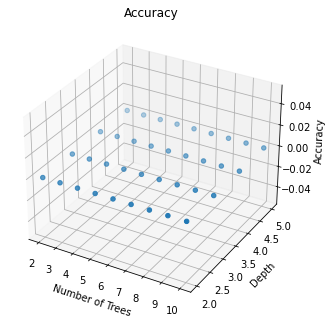

In [70]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = Axes3D(fig)

ax.scatter(table_of_results["Number of Trees"], table_of_results["Depth"], table_of_results["Accuracy"])

ax.set_xlabel(columns_entries[0])
ax.set_ylabel(columns_entries[1])
ax.set_zlabel(columns_entries[6])

ax.set_title('Accuracy')
plt.show()

In [71]:
maximum_table

,TP,FP,TN,FN,Accuracy,TPR,TNR,Number of Trees,Depth
0,0,0,0,0,0.0,0,0,2,2


## WIP beyond this point

In [48]:
x_headers = list(patients_gene_network)[1:-1]
x_headers

['UNC79',
 'RASGRP1',
 'FGFR3',
 'CMYA5',
 'RAF1',
 'GLI1',
 'STX11',
 'C9orf24',
 'RGS3',
 'EGFR',
 'RPS6KA2',
 'SORCS2',
 'DNAI1',
 'RAB19',
 'RAB39A',
 'POLR2A',
 'XRCC4',
 'TAF1',
 'SECISBP2L',
 'ARID4A',
 'DNAH2',
 'KANK1',
 'NFE2L2',
 'LGR6',
 'NEGR1',
 'DMD',
 'PTPRB',
 'PHF14',
 'CTTNBP2',
 'KDM6A',
 'MAP3K5',
 'AHI1-DT',
 'GLDN',
 'ARID1A',
 'UBAP1',
 'MYLK',
 'FAT1',
 'TSHR',
 'PDGFRA',
 'SOX10',
 'KIAA1211',
 'LURAP1L',
 'SMAD4',
 'UST',
 'IGF1R',
 'TACC3',
 'PTPN11',
 'PTPRD',
 'L3HYPDH',
 'EPHA3',
 'FANCI',
 'PTCH1',
 'RAD51B',
 'C1orf49',
 'TJP2',
 'EP300',
 'RAD54L',
 'CCDC171',
 'LRP6',
 'JAK1',
 'MED23',
 'ATRX',
 'MDM2',
 'C16orf70',
 'TCRA',
 'NKAIN2',
 'C11orf53',
 'LAMA2',
 'SAP130',
 'HDAC4',
 'BCL2',
 'MDN1',
 'BNC2',
 'KCNH8',
 'PDCD1LG2',
 'SEC16A',
 'MYO5A',
 'HLA',
 'HLA-H',
 'FAM118B',
 'PPP1R3A',
 'BOC',
 'HBS1L',
 'C16orf52',
 'HIPK3',
 'GREM1',
 'PPP2R1A',
 'GSK3B',
 'SMARCA4',
 'POLH',
 'WAC',
 'KIAA0247',
 'LDLRAD3',
 'ASXL1',
 'ERC1',
 'PTPRM',
 'DICER

In [49]:
train, test = train_test_split(patients_gene_network, test_size=0.2, random_state=42, shuffle=True)

X_train = train[x_headers].to_numpy()
y_train = train['Survived'].to_numpy()
X_test = test[x_headers].to_numpy()
y_test = test['Survived'].to_numpy()

In [50]:
clf_model = RandomForestClassifier(n_estimators=100) 
clf_model.fit(X_train, y_train)
y_predicted = clf_model.predict(X_test)

In [51]:
metrics.accuracy_score(y_test, y_predicted)

0.9043062200956937